# In this notebook there will be clustered data by credit card

In [3]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
# Download dataset
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

dt = pd.read_csv(f'{path}/CC GENERAL.csv')

100%|██████████| 340k/340k [00:00<00:00, 63.0MB/s]

Extracting files...


## Introducing with the dataset

In [ ]:
dt.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
dt.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
dt.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Visualization

In [6]:
# Scatter plots
plt.figure(figsize=(10, 8))
sns.pairplot(dt[dt.select_dtypes(include=['number']).columns])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Preprocessing

In [7]:
# Defining pipeline

pip = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [8]:
proc_dt = pip.fit_transform(dt)

In [9]:
proc_dt = pd.DataFrame(proc_dt, columns=dt.columns)

In [ ]:
proc_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

## Implementing Cluster model

In [18]:
# Finding the K with Elbow Method

wcss = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(proc_dt)
    wcss.append(kmeans.inertia_)

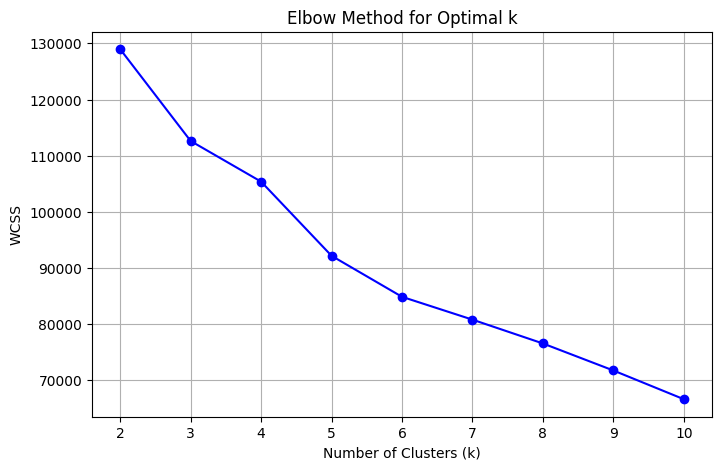

In [19]:
# And try to Plot it
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Looking to the plot it is clear that the steps between 6 and 8 is lowest ones so, there was chose the 7

In [12]:
# Fit the model

k = 7
kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
y_pred = kmeans.fit(proc_dt)

In [13]:
sil_score = silhouette_score(proc_dt, y_pred.labels_)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.2150


In [14]:
# K-Means++ initialization
kmeans_plus = KMeans(n_clusters=7, init='k-means++', random_state=42, n_init=10)
y_pred_plus = kmeans.fit_predict(proc_dt)


sil_score_plus = silhouette_score(proc_dt, kmeans.labels_)
print(f"Silhouette Score (K-Means++): {sil_score_plus:.4f}")

Silhouette Score (K-Means++): 0.2150


In [23]:
k_values = range(2, 11)
sil_scores = []

# Test different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(proc_dt)
    sil_score = silhouette_score(proc_dt, labels)
    sil_scores.append(sil_score)
    print(f"Silhouette Score for k={k}: {sil_score:.4f}")

Silhouette Score for k=2: 0.2100
Silhouette Score for k=3: 0.2506
Silhouette Score for k=4: 0.1976
Silhouette Score for k=5: 0.1932
Silhouette Score for k=6: 0.2026
Silhouette Score for k=7: 0.2150
Silhouette Score for k=8: 0.2081
Silhouette Score for k=9: 0.2149
Silhouette Score for k=10: 0.2205


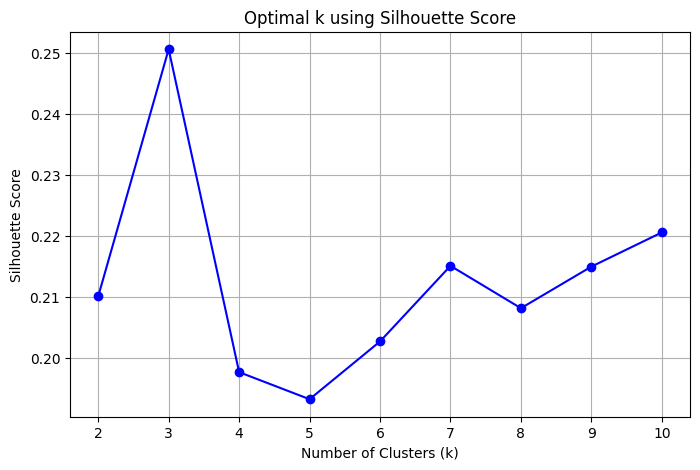

In [24]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, sil_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Optimal k using Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

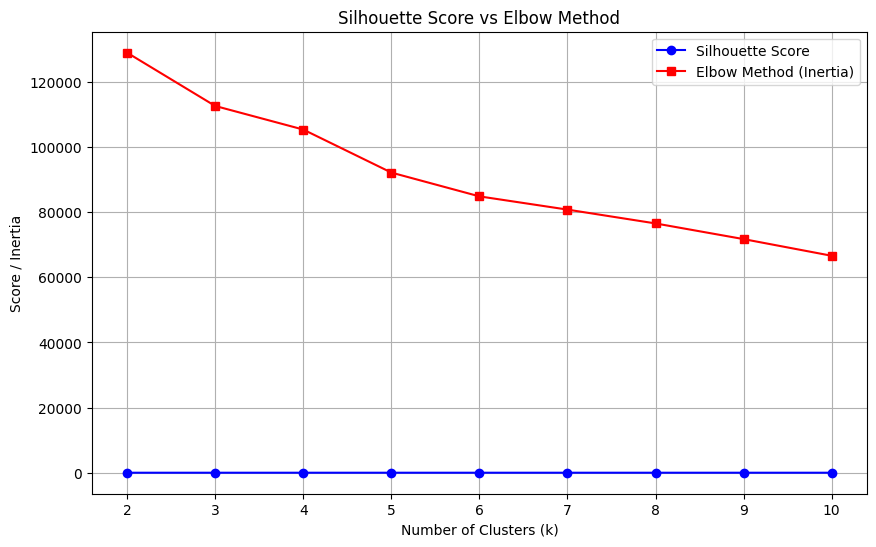

In [25]:
# Comparison of two metrics

plt.figure(figsize=(10, 6))
plt.plot(k_values, sil_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.plot(k_values, wcss, marker='s', linestyle='-', color='r', label='Elbow Method (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score / Inertia')
plt.title('Silhouette Score vs Elbow Method')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()